In [1]:
# task 2

In [2]:
# Sentiment Analysis using TF-IDF and Logistic Regression

In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [4]:
# Step 2: Load Dataset
df = pd.read_csv('customer_reviews.csv')
print(df.head())

                                             Review Sentiment
0                 The product quality is excellent!  positive
1               I am very unhappy with the service.  negative
2    Delivery was quick and the packaging was nice.  positive
3       The item arrived damaged very disappointed.  negative
4  This is the best purchase I have made this year!  positive


In [5]:
# Step 3: Preprocess Data
# Lowercasing, removing punctuations, etc. (basic cleaning)
df['Review'] = df['Review'].str.lower()
df['Review'] = df['Review'].str.replace('[^a-zA-Z ]', '', regex=True)

In [6]:
# Step 4: TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['Review']).toarray()
y = df['Sentiment']

In [7]:
# Step 5: Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [8]:
# Step 6: Build and Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:

# Step 7: Evaluate the Model
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00       0.0
     neutral       0.00      0.00      0.00       1.0
    positive       0.00      0.00      0.00       2.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0


Confusion Matrix:
 [[0 0 0]
 [1 0 0]
 [2 0 0]]


c:\Users\raush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\raush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\raush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\raush\anaconda3\Lib\site-packages\sklearn\metrics\_cla

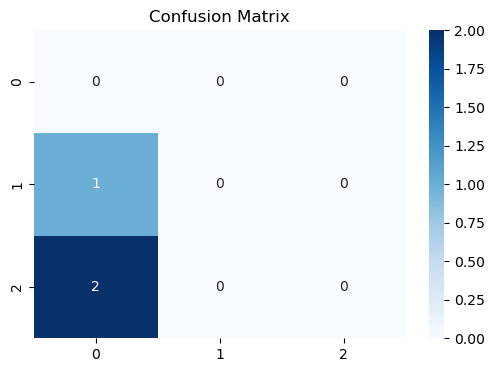

In [10]:
# Step 8: Visualize Confusion Matrix
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [11]:
# end of task 2